In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


# Data Exploration 

In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

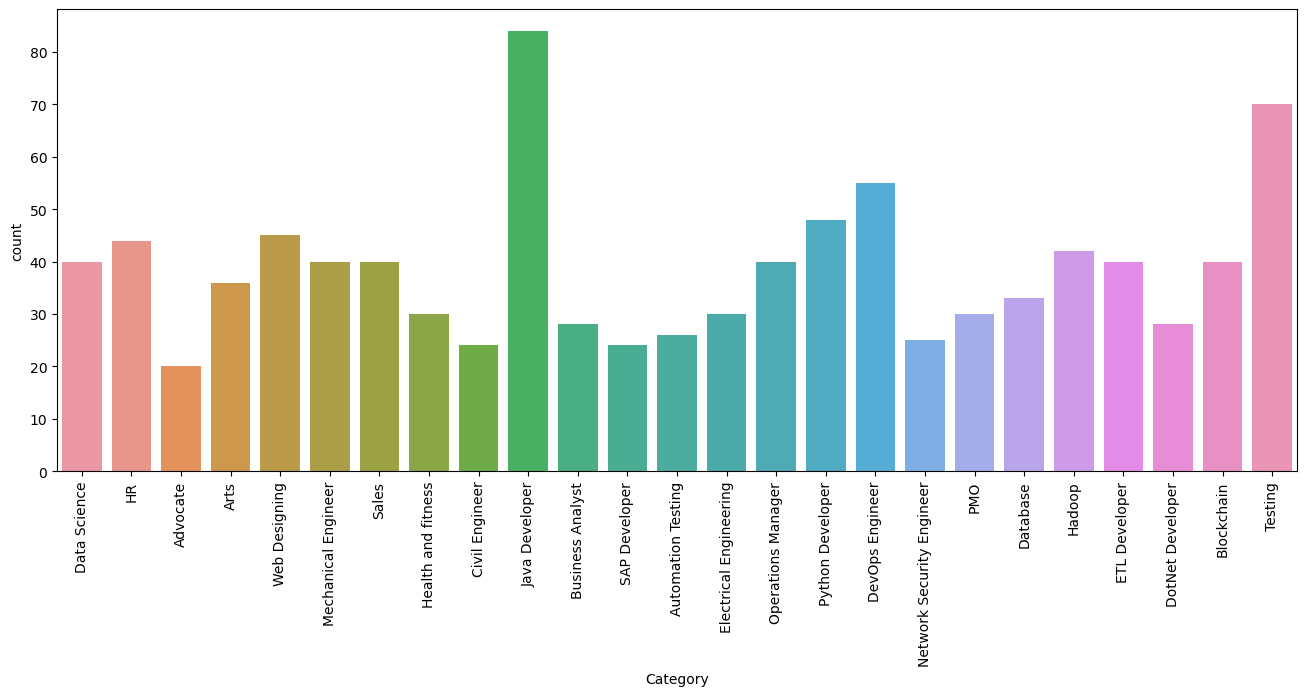

In [10]:
plt.figure(figsize=(16,6))
sns.countplot(x='Category', data=df)
plt.xticks(rotation=90)
plt.show()

In [11]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

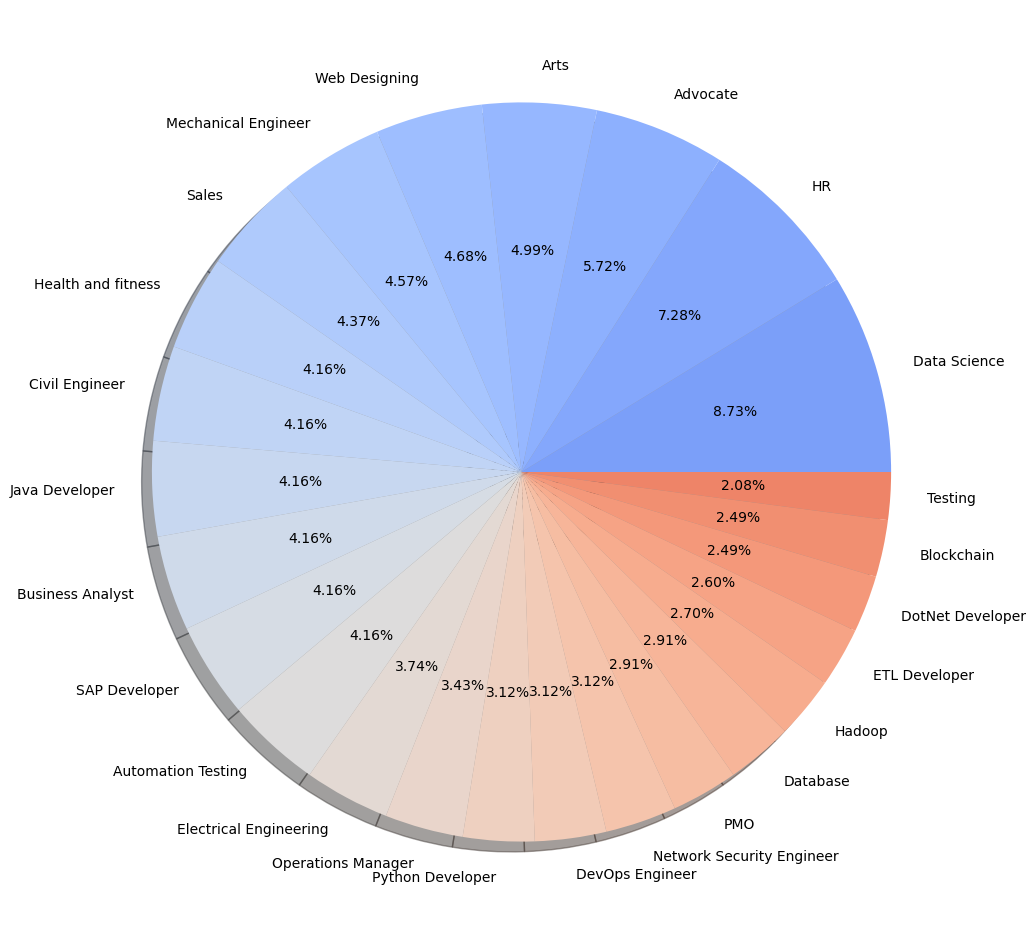

In [21]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

plt.figure(figsize=(18,12))
plt.pie(counts,labels=labels,autopct='%1.2f%%',shadow=True, colors=plt.cm.coolwarm(np.linspace(0.2, 0.8, len(counts))))
plt.show()

In [22]:
df['Category'][0]

'Data Science'

In [23]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Data Cleaning

To remove URLs, hashtags, mentions, special letters, punctuations:

In [24]:
import re

def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)   # It searches for strings starting with "http" followed by any non-whitespace 
                                                 # character (\S+) one or more times, and ending with whitespace (\s).
        
    cleanText = re.sub('RT|cc', ' ', cleanText) # removes text commonly found in email forwards, like "RT" (retweet) or "cc" (carbon copy)
    
    cleanText = re.sub('#\S+\s', ' ', cleanText) # removes hashtags (starting with "#") followed by .....
    
    cleanText = re.sub('@\S+', '  ', cleanText) #  removes mentions (starting with "@") followed by ....
    
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText) # removes various special characters and punctuation marks.
    
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) # removes non-ASCII characters (characters outside the standard English character set).
    
    cleanText = re.sub('\s+', ' ', cleanText) # removes any sequence of whitespace characters (spaces, tabs, newlines)
    
    return cleanText

# re.sub() function substitutes a pattern in a string with a replacement string

In [26]:
cleanResume("my #### $ #  #Nikhy webiste is like       this http://youtube and access it using  @gmail.com")

'my webiste is like this and a ess it using '

In [27]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [28]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

# words into categorical values

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [30]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [31]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

# Vectorization

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer #This class is used to convert text data into numerical features suitable for ML algorithms.
tfidf = TfidfVectorizer(stop_words='english')  #indicating that the vectorizer should remove common English stop words (e.g., "the", "a", "an") from the text before processing

tfidf.fit(df['Resume'])
inp_Txt  = tfidf.transform(df['Resume'])

In [34]:
inp_Txt

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

# Model building

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inp_Txt, df['Category'], test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(769, 7351)
(193, 7351)


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier()) # defines a classifier object in scikit-learn for multi-class classification
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


#  OneVsRestClassifier,
   A class from scikit-learn's multiclass module. It implements the one-vs-rest (OvR) strategy, also known as one-vs-all, for multi-class classification.
   
One-vs-Rest Strategy:

The OvR strategy breaks down a multi-class classification problem into multiple binary classification problems. It trains one binary classifier for each class.
For example, if you have three classes (A, B, C), the OvR approach would train three classifiers:
Classifier 1: Classify documents as A vs. not A (combining B and C as the negative class).
Classifier 2: Classify documents as B vs. not B (combining A and C as the negative class).
Classifier 3: Classify documents as C vs. not C (combining A and B as the negative class).

In [39]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

 # using the pickle module in Python to save two objects,the fitted TfidfVectorizer (tfidf)
    # and the trained classifier (clf), to separate pickle files

In [42]:
my_resume = """ I am an AI Engineer With
a strong background in mathematics, statistics,
and programming , Technical Skills • Programming Languages: C/C++, Python, Matlab • Other Skills : HTML, CSS, SQL, React, Django
• Frameworks/Technologies: Scikit-learn, Keras, Tensorflow, PyTorch, Tableau, Huggingface, Github, VS code, Overleaf. Key courses taken
• CSE: Reinforcement Learning, Computer Vision, Discrete Mathematics, Programming in C, Algorithm & Data Structures,
Database Management Systems.
• Maths: Foundations of Data Science, Machine Learning and Neural Networks, Applied Linear Algebra & Matrix Analysis, Graph Theory, Theory of Computation, Analysis and Design of Algorithms, Fuzzy Logic
• Others: Numerical Analysis using Matlab, Tinkering Lab, Mandarin Chinese-basic level. I had explored much in Deep Learning , Computer Vision, Reinforcement Learning,"""

In [44]:
clf = pickle.load(open('clf.pkl', 'rb'))  # Load the trained classifier

cleaned_resume = cleanResume(my_resume) # Clean the input resume

tfidf = pickle.load(open('tfidf.pkl', 'rb'))

input_features = tfidf.transform([cleaned_resume]) # Transform the cleaned resume using the trained TfidfVectorizer

prediction_id = clf.predict(input_features)[0] # predicting using the loaded classifier

category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6
